In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

Text(0, 0.5, 'pcc')

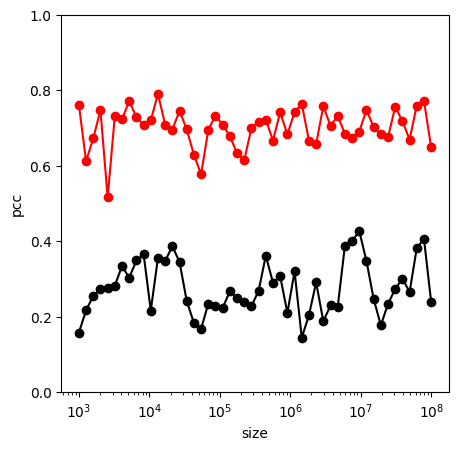

In [3]:
fil_critical = np.load("../data/size_influence_from_critical.npz")
fil_supercritical = np.load("../data/size_influence_from_supercritical_new.npz")
pcc_critical = fil_critical["pcc"]
pcc_supercritical = fil_supercritical["pcc"]
fig = plt.figure(figsize=(5, 5), dpi=100)
ax = fig.gca()
n_size = np.logspace(3, 8, 50)
ax.plot(n_size, pcc_critical, "o-", color="k")
ax.plot(n_size, pcc_supercritical, "o-", color="r")
ax.set_ylim([0, 1])
ax.set_xscale("log")
ax.set_xlabel("size")
ax.set_ylabel("pcc")

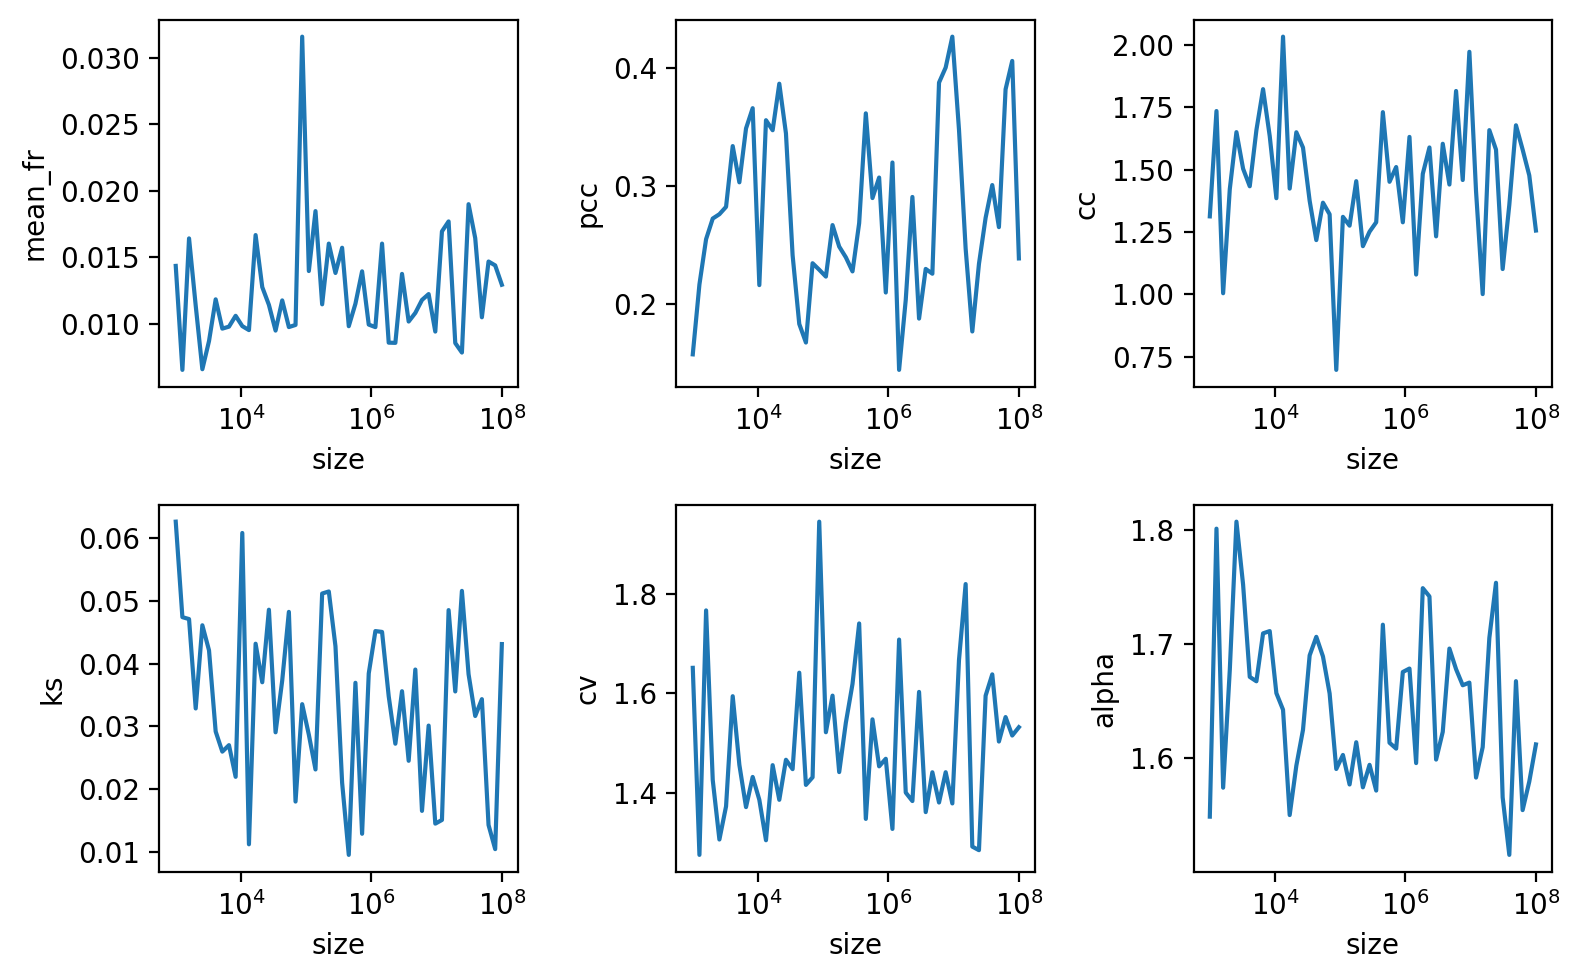

In [2]:
file = np.load("../data/size_influence_from_critical.npz")
n_size = np.logspace(3, 8, 50)
mean_fr = file["mean_fr"]
pcc = file["pcc"]
cc = file["cc"]
ks = file["ks"]
cv = file['cv']
alpha = file["exponent"]
fig, ax = plt.subplots(2, 3, figsize=(8, 5), dpi=200)
ax = ax.flatten()
ax[0].plot(n_size, mean_fr)
ax[0].set_ylabel("mean_fr")
ax[1].plot(n_size, pcc)
ax[1].set_ylabel("pcc")
ax[2].plot(n_size, cc)
ax[2].set_ylabel("cc")
ax[3].plot(n_size, ks)
ax[3].set_ylabel("ks")
ax[4].plot(n_size, cv)
ax[4].set_ylabel("cv")
ax[5].plot(n_size,alpha)
ax[5].set_ylabel("alpha")
for i in range(6):
    ax[i].set_xlabel("size")
    ax[i].set_xscale("log")
fig.tight_layout()

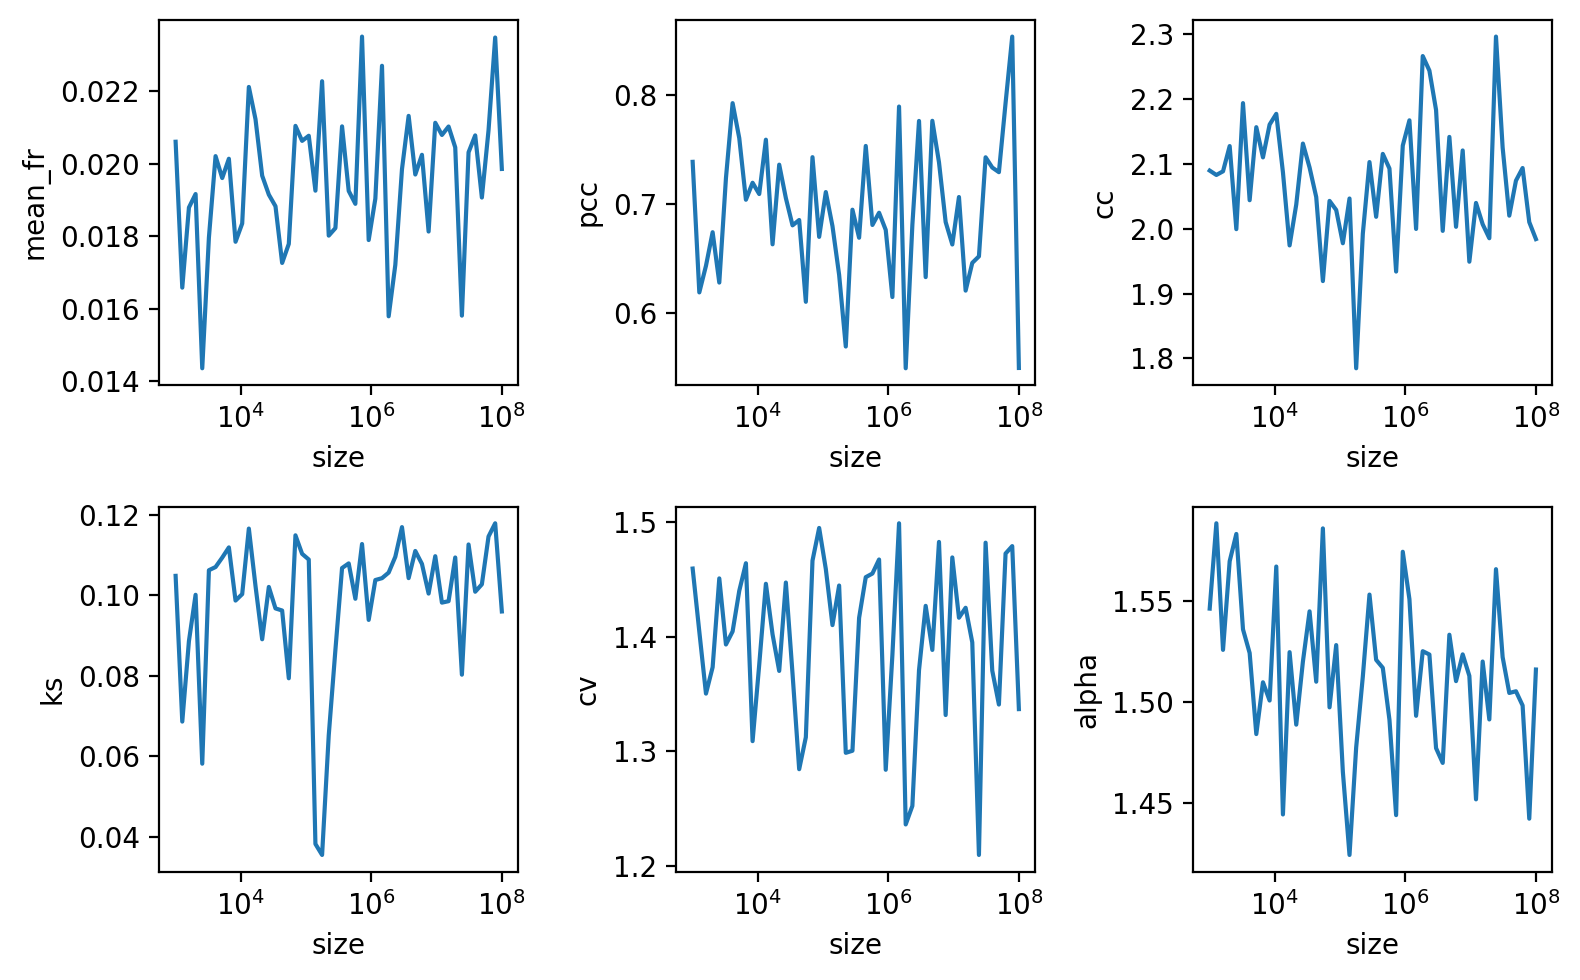

In [3]:
file = np.load("../data/size_influence_from_supercritical.npz")
n_size = np.logspace(3, 8, 50)
mean_fr = file["mean_fr"]
pcc = file["pcc"]
cc = file["cc"]
ks = file["ks"]
cv = file['cv']
alpha = file["exponent"]
fig, ax = plt.subplots(2, 3, figsize=(8, 5), dpi=200)
ax = ax.flatten()
ax[0].plot(n_size, mean_fr)
ax[0].set_ylabel("mean_fr")
ax[1].plot(n_size, pcc)
ax[1].set_ylabel("pcc")
ax[2].plot(n_size, cc)
ax[2].set_ylabel("cc")
ax[3].plot(n_size, ks)
ax[3].set_ylabel("ks")
ax[4].plot(n_size, cv)
ax[4].set_ylabel("cv")
ax[5].plot(n_size,alpha)
ax[5].set_ylabel("alpha")
for i in range(6):
    ax[i].set_xlabel("size")
    ax[i].set_xscale("log")
fig.tight_layout()

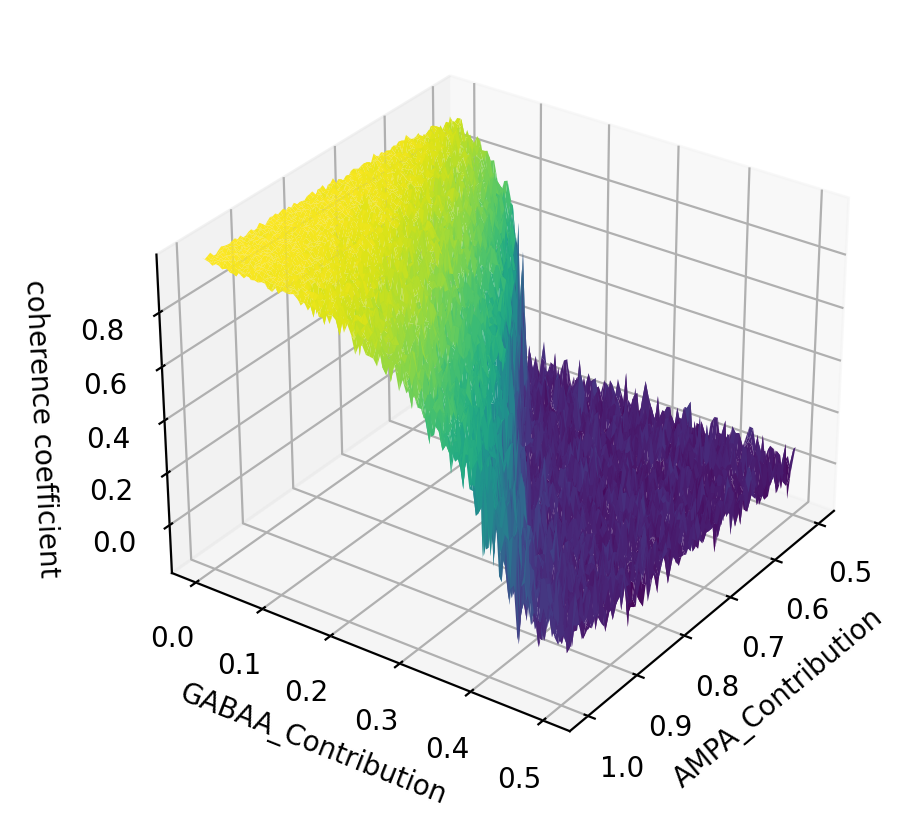

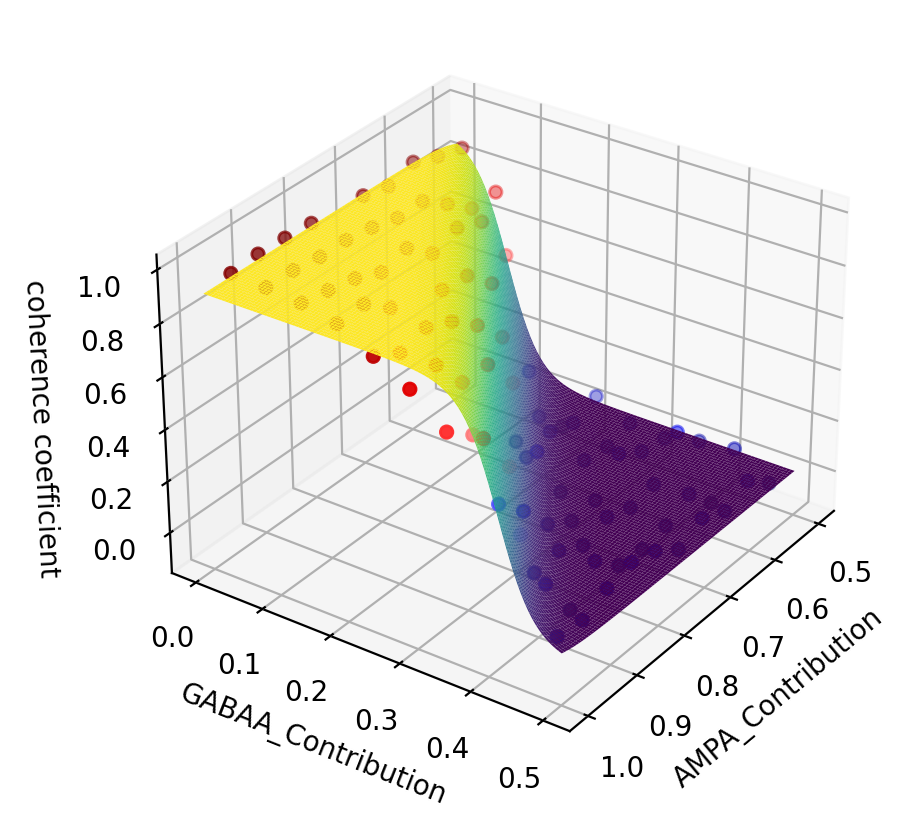

In [4]:
pcc = np.load('../data/grid_search.npz')["pcc"]
x = np.linspace(0.5, 1, 100)
y = np.linspace(0, 0.5, 100)
xx, yy = np.meshgrid(x, y, indexing="ij")
fig = plt.figure(figsize=(5, 5), dpi=200)
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, pcc, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel("AMPA_Contribution")
ax.set_ylabel("GABAA_Contribution")
ax.set_zlabel("coherence coefficient")
ax.view_init(30, 35)
fig.savefig("small_block_dense_grid_pcc.pdf")


fig = plt.figure(figsize=(5, 5), dpi=200)
ax = plt.axes(projection="3d")
file = loadmat(r"C:\Users\lucky\Documents\WeChat Files\wxid_yv8ys00jk82222\FileStorage\File\2022-05\boudary_new.mat")
a_pcc = file["a_pcc"].squeeze()
b_pcc = file["b_pcc"].squeeze()
func_pcc = b_pcc[0] * np.tanh(a_pcc[0] * xx + a_pcc[1] * yy + a_pcc[2]) + b_pcc[1]
ax.plot_surface(xx, yy, func_pcc, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
pcc2 = np.load('../data/big_block_simulation.npz')["pcc"]
pcc2_index = np.nonzero(pcc2)
pcc2 = pcc2[pcc2_index]
x2 = x[pcc2_index[0]]
y2 = y[pcc2_index[1]]
ax.scatter3D(x2, y2, pcc2, c=pcc2, cmap='seismic')
ax.set_xlabel("AMPA_Contribution")
ax.set_ylabel("GABAA_Contribution")
ax.set_zlabel("coherence coefficient")
ax.view_init(30, 35)
fig.savefig("100m_block_sparse_point_pcc.pdf")
